In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv(r'D:\mini project\AI project\chatbot\data\data.csv')

# Check for missing values
print("\nMissing values in Labels Data:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()


Missing values in Labels Data:
Body Size               0
Body Weight             0
Height                  0
Bone Structure          0
Complexion              0
General feel of skin    0
Texture of Skin         0
Hair Color              0
Appearance of Hair      0
Shape of face           0
Eyes                    0
Eyelashes               0
Blinking of Eyes        0
Cheeks                  0
Nose                    0
Teeth and gums          0
Lips                    0
Nails                   0
Appetite                0
Liking tastes           0
Dosha                   0
dtype: int64


In [3]:
# Save input and output columns
X = data.iloc[:, :20]  # Features
y = data['Dosha']  # Labels (replace 'Dosha' with the actual column name)

# Handle categorical data in X using Label Encoding for non-numeric columns
label_encoder = LabelEncoder()

In [4]:
# Apply label encoding on each categorical column in X
for column in X.select_dtypes(include=['object']).columns:
    X.loc[:, column] = label_encoder.fit_transform(X[column])

In [5]:
# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (840, 20)
Testing set size: (360, 20)


In [8]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the Naive Bayes Classifier
nb = GaussianNB()

In [9]:
# Train the model
model = nb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 73.61%



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        79
           1       0.42      0.88      0.57        43
           2       1.00      1.00      1.00        22
           3       0.84      0.61      0.71       187
           4       1.00      1.00      1.00        14
           5       0.83      1.00      0.91        15

    accuracy                           0.74       360
   macro avg       0.81      0.88      0.83       360
weighted avg       0.79      0.74      0.74       360

Cross-Validation Accuracy:  0.725


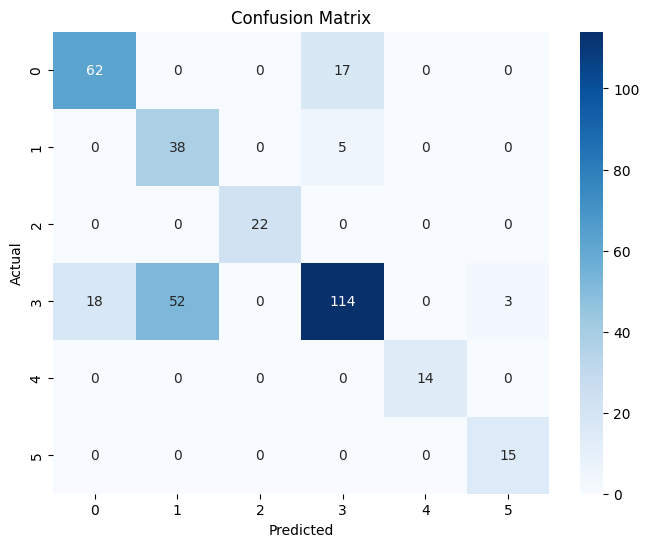

In [10]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Accuracy: ", cv_scores.mean())

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()